In [62]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

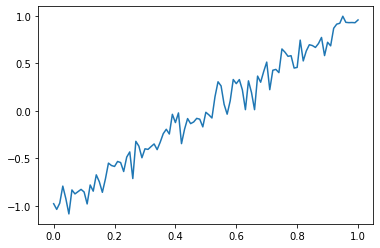

In [63]:
dx = 0.01
x_data = np.arange(0,1+dx,dx)
N = x_data.shape[0]
x_data = x_data.reshape((N,1))
y_data = x_data*2 + np.random.randn(N,1)*0.1-1
plt.plot(x_data,y_data)

In [64]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
omega_0 = np.zeros((2,1))
omega_0[1,0] = 1
omega_0 = np.random.randn(2,1)
omega = tf.Variable(initial_value = omega_0,trainable=True)

for i in range(0,10):
    for j in range(0,100):
        with tf.GradientTape() as tape:
            
            y_predictions = omega[0,0]**2 + omega[1,0]**2*x_data 
            loss = tf.math.reduce_sum(tf.square(y_predictions - y_data))

        optimizer.minimize(loss, omega,tape=tape)
    print(loss)



tf.Tensor(27.311249118672205, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)
tf.Tensor(27.311249109748342, shape=(), dtype=float64)


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-1.57439678e-48],
       [-6.94086137e-01]])>


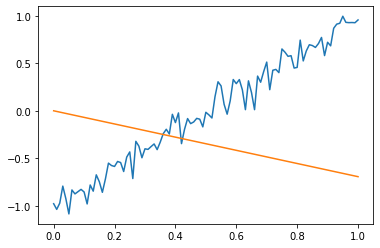

In [65]:
plt.plot(x_data,y_data)
plt.plot(x_data,omega[0,0] + omega[1,0]*x_data)
print(omega)